In [63]:
import pandas as pd
from IPython.display import display
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

# Pfad zur PHYLIP-Datei
phylip_file = "dataSources\Align.HOMOLOG.Phylip"

# Sequenzen aus der PHYLIP-Datei einlesen
sequences = SeqIO.to_dict(SeqIO.parse(phylip_file, "phylip"))

# DataFrame erstellen
df = pd.DataFrame.from_dict(sequences, orient="index")
df.reset_index(inplace=True)
display(df)

np.unique(df).shape


,index,0,1,2,3,4,5,6,7,8,...,278,279,280,281,282,283,284,285,286,287
0,sp|P62593|,M,S,I,Q,H,F,R,V,A,...,G,A,S,L,I,K,H,W,-,-
1,tr|A0A0H3E,M,S,I,Q,H,F,R,V,A,...,G,A,S,L,I,K,H,W,-,-
2,sp|Q93LM8|,-,-,M,R,Y,F,R,L,C,...,G,A,A,L,I,E,H,W,Q,R
3,sp|P0A9Z7|,-,-,M,R,Y,I,R,L,C,...,G,A,A,L,I,E,H,W,Q,R
4,sp|P0AD63|,-,-,M,R,Y,I,R,L,C,...,G,A,A,L,I,E,H,W,Q,R
5,sp|O08337|,-,-,M,R,Y,I,R,L,C,...,G,A,A,L,I,E,H,W,Q,R
6,sp|Q9S169|,-,-,M,R,Y,I,R,L,C,...,G,A,A,L,I,E,H,W,Q,R


(28,)

In [65]:
#set funktion entfernt Identische aminosäuren
# wenn 1 dann sind alle identisch

identical_row = df.iloc[:, 1:].apply(lambda x : len(set(x)),  axis= 0 )

identical_row_df = pd.DataFrame({'Identical Counts': identical_row}).T
identical_df = pd.concat([df, identical_row_df])

print(identical_df)




                       index  0  1  2  3  4  5  6  7  8  ... 278 279 280 281  \
0                 sp|P62593|  M  S  I  Q  H  F  R  V  A  ...   G   A   S   L   
1                 tr|A0A0H3E  M  S  I  Q  H  F  R  V  A  ...   G   A   S   L   
2                 sp|Q93LM8|  -  -  M  R  Y  F  R  L  C  ...   G   A   A   L   
3                 sp|P0A9Z7|  -  -  M  R  Y  I  R  L  C  ...   G   A   A   L   
4                 sp|P0AD63|  -  -  M  R  Y  I  R  L  C  ...   G   A   A   L   
5                 sp|O08337|  -  -  M  R  Y  I  R  L  C  ...   G   A   A   L   
6                 sp|Q9S169|  -  -  M  R  Y  I  R  L  C  ...   G   A   A   L   
Identical Counts         NaN  2  2  2  2  2  2  1  2  2  ...   1   1   2   1   

                 282 283 284 285 286 287  
0                  I   K   H   W   -   -  
1                  I   K   H   W   -   -  
2                  I   E   H   W   Q   R  
3                  I   E   H   W   Q   R  
4                  I   E   H   W   Q   R  
5                  I 

In [66]:
# Pickle-Datei einlesen mit Robustness und Fragility Score für jede Position
df_robustness = pd.read_pickle('robustness.pkl')
df_fragility = pd.read_pickle('fragility.pkl')
print(df_fragility)


          mean_Stiffler_zAUC  mean_Deng_zAUC  mean_Firnberg_zAUC  \
Position                                                           
24                  0.000000        0.115346            0.000000   
25                  0.000000        0.000000            0.000000   
26                  0.000000        0.000000            0.000000   
27                  0.212493        0.028022            0.075636   
28                  0.044158        0.055596            0.001111   
...                      ...             ...                 ...   
282                 0.548602        0.010074            0.550766   
283                 0.128440        0.101862            0.120586   
284                 0.018532        0.003683            0.010074   
285                 0.088315        0.074128            0.029647   
286                 1.461387        3.206662            0.520174   

          mean_all_zAUC  
Position                 
24             0.000000  
25             0.000000  
26         

In [78]:
#Für Vergleich müssen ersten und letzten zwei Spalten entfernt werden 
identical_df_cut = identical_df.drop(df.columns[:3], axis=1).drop(df.columns[-2:], axis=1)

#Die Spalten müssen umbenannt werden nach Positionen von26-284
#new_columns = list(range(26, 284))
#identical_df_cut.columns = new_columns
#identical_df_cut_renamed = identical_df_cut.rename(columns= new_columns)
display(identical_df_cut)

df_array = identical_df_cut.to_numpy()

# Verwende np.unique(), um ein Array von eindeutigen Werten zu erhalten
unique_values = np.unique(df_array)

# Bestimme die Anzahl der eindeutigen Werte
anzahl_unique_values = len(unique_values)
#np.unique(identical_df_cut).shape

#Vorsicht Spaltennamen später anfügen
#unique funktioniert nicht




,2,3,4,5,6,7,8,9,10,11,...,276,277,278,279,280,281,282,283,284,285
0,I,Q,H,F,R,V,A,L,I,P,...,E,I,G,A,S,L,I,K,H,W
1,I,Q,H,F,R,V,A,L,I,P,...,E,I,G,A,S,L,I,K,H,W
2,M,R,Y,F,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
3,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
4,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
5,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
6,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
Identical Counts,2,2,2,2,1,2,2,2,1,2,...,2,1,1,1,2,1,1,2,1,1


TypeError: '<' not supported between instances of 'int' and 'str'

In [68]:
#Auch hier in gleiches Raster bringen cuten und transponieren 
df_robustness_cut = df_robustness.iloc[2 :-1]
df_fragility_cut = df_fragility.iloc[2:-1]


df_fragility_cut_trp = df_fragility_cut.transpose()
df_robustness_cut_trp = df_robustness_cut.transpose()
print(df_fragility_cut_trp)


Position            26        27        28        29        30        31   \
mean_Stiffler_zAUC  0.0  0.212493  0.044158  0.001111  0.010074  2.358474   
mean_Deng_zAUC      0.0  0.028022  0.055596  0.000000  0.050371  0.010074   
mean_Firnberg_zAUC  0.0  0.075636  0.001111  0.000000  0.018532  1.222653   
mean_all_zAUC       0.0  0.137241  0.023715  0.000000  0.014011  1.126706   

Position                 32        33        34        35   ...       276  \
mean_Stiffler_zAUC  0.181753  0.118379  0.344358  1.928602  ...  0.014011   
mean_Deng_zAUC      0.037064  0.000000  0.271971  1.050581  ...  0.151005   
mean_Firnberg_zAUC  0.087256  0.161746  0.122136  0.422819  ...  0.101862   
mean_all_zAUC       0.119490  0.000000  0.589095  2.146906  ...  0.001111   

Position                 277       278       279       280       281  \
mean_Stiffler_zAUC  0.023715  1.174047  0.188864  0.010074  0.000000   
mean_Deng_zAUC      0.000000  1.868613  1.677192  0.029647  0.000000   
mean_Firnber

In [69]:
# #Data Mergen in einem Dataframe:
df_Align = pd.concat([identical_df_cut_renamed, df_fragility_cut_trp, df_robustness_cut_trp], ignore_index=True)

#Zeilen Beschriften 
zeilennamen = df.index
rowname = ['Set', 'Fragility_S', 'Fragility_D', 'Fragility_F', 'Fragility_M', 'Robustness_S', 'Robustness_D', 'Robustness_F', 'Robustness_M']
rownameindex = pd.Index(rowname)#aus Liste Index machen
rowname_liste = zeilennamen.append(rownameindex)

df_Align_named = df_Align.rename(index=dict(zip(df_Align.index, rowname_liste)))


#wegen Indexverschiebung im Plot 25 leere Spalten anfügen

# for i in range(0,26):
#    df_Align_named.insert(i,'i',0) #i already exist?
display(df_Align_named)




,26,27,28,29,30,31,32,33,34,35,...,276,277,278,279,280,281,282,283,284,285
0,I,Q,H,F,R,V,A,L,I,P,...,E,I,G,A,S,L,I,K,H,W
1,I,Q,H,F,R,V,A,L,I,P,...,E,I,G,A,S,L,I,K,H,W
2,M,R,Y,F,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
3,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
4,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
5,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
6,M,R,Y,I,R,L,C,I,I,S,...,G,I,G,A,A,L,I,E,H,W
Set,2,2,2,2,1,2,2,2,1,2,...,2,1,1,1,2,1,1,2,1,1
Fragility_S,0.0,0.212493,0.044158,0.001111,0.010074,2.358474,0.181753,0.118379,0.344358,1.928602,...,0.014011,0.023715,1.174047,0.188864,0.010074,0.0,0.548602,0.12844,0.018532,0.088315
Fragility_D,0.0,0.028022,0.055596,0.0,0.050371,0.010074,0.037064,0.0,0.271971,1.050581,...,0.151005,0.0,1.868613,1.677192,0.029647,0.0,0.010074,0.101862,0.003683,0.074128


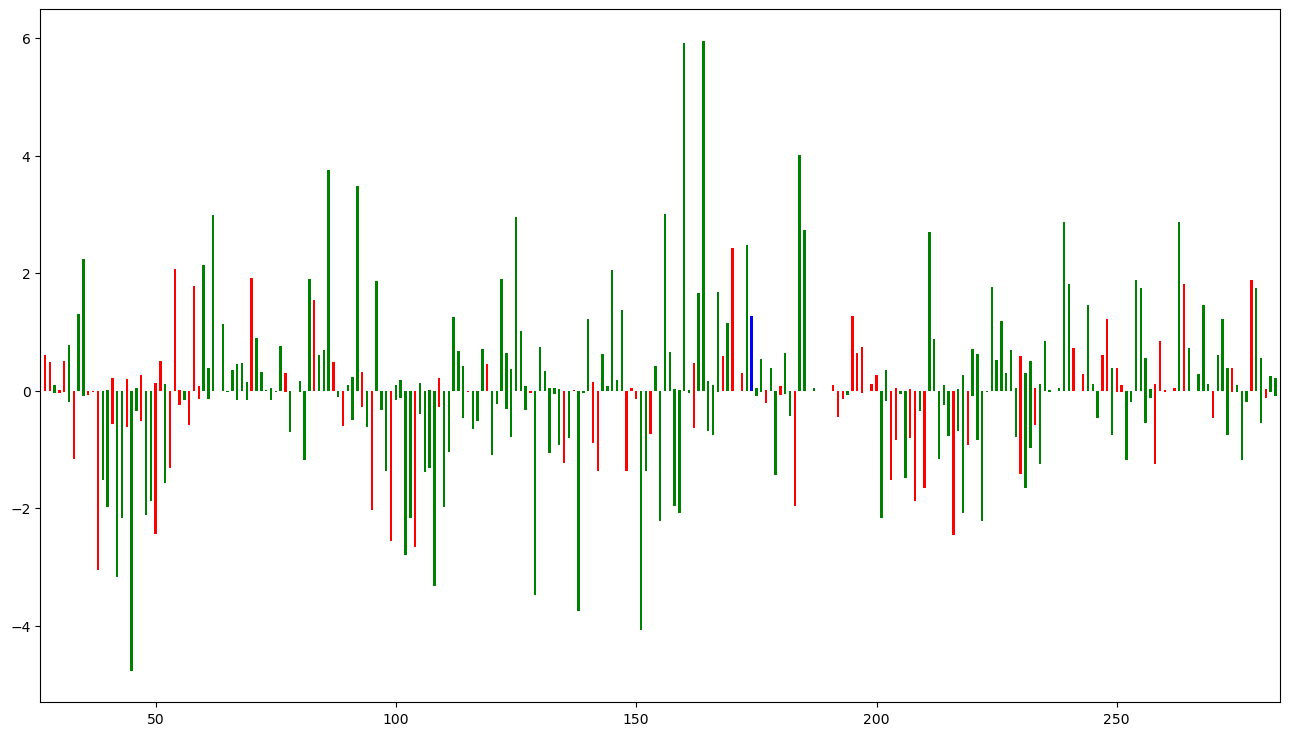

In [70]:
#Zeigt sich Robustness als nicht konserviert und Fragility als Konserviert?
positions = df_Align_named.index
type(positions)
#x = range(26,284) #mismatch 
x = range(284)

def color_mapper(s):
    if s == 2:
        return 'red'
    elif s == 1:
        return 'green'
    else:
        return 'blue'

colors = df_Align_named.loc['Set'].apply(color_mapper)


# Barplot erstellen, Fragility Werte negativ 

#Stiffler

plt.figure(figsize=(16,9))
plt.xlim(26, 284)
plt.bar(x, df_Align_named.loc['Fragility_S']*-1, label='F_S', color= colors, width=0.5, linewidth=0)
plt.bar(x, df_Align_named.loc['Robustness_S'], label='R_S', color=colors, width=0.5, linewidth=0)
plt.show()

In [71]:
#print(len(df_Align_named)
# display(df_Align_named.loc['Fragility_S']*-1)
# #warum ist länge nicht 
# print(df_Align_named.shape)
# print(len(x))
# #verschoben um 25 As, warum ist len des frames 284 und nicht 260? 
# #285 Einträge -25 = 260 Werte 
# #Nimmt spaltenindex von 285 und subtrahiert 1 weil es ab 0 anfängt zu zählen?

np.unique(df_Align_named.columns).shape

df_Align_named.to_csv('test.csv')



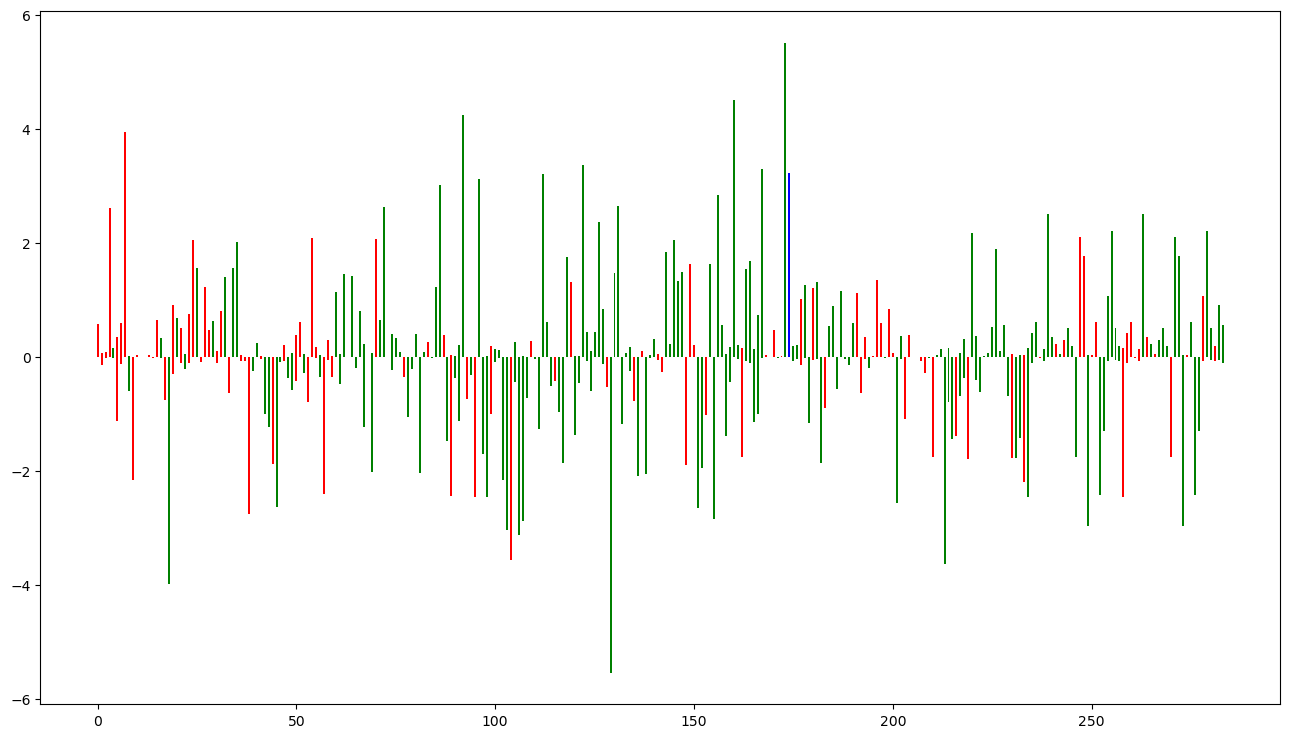

In [72]:
#Mean
plt.figure(figsize=(16,9))
plt.bar(x, df_Align_named.loc['Fragility_M']*-1, label='F_S', color= colors, width=0.5, linewidth=0)
plt.bar(x, df_Align_named.loc['Robustness_M'], label='R_S', color=colors, width=0.5, linewidth=0)
plt.show()

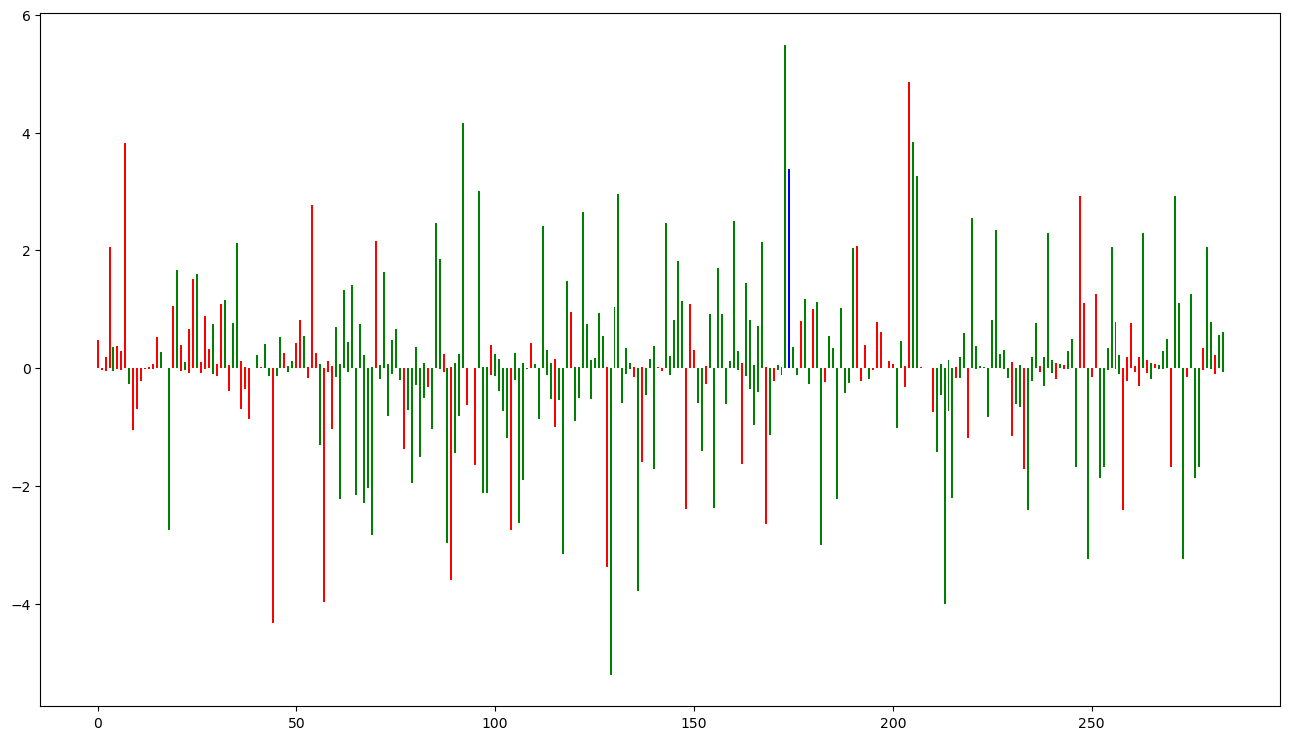

In [73]:

plt.figure(figsize=(16,9))
plt.bar(x, df_Align_named.loc['Fragility_D']*-1, label='F_S', color= colors, width=0.5, linewidth=0)
plt.bar(x, df_Align_named.loc['Robustness_D'], label='R_S', color=colors, width=0.5, linewidth=0)
plt.show()

In [74]:
print(len(x))
len(df_Align_named.loc['Fragility_S'])


284


284

In [75]:
#Maximal 3 verscheiden AS an einer Position
positions3 = df_Align_named.columns[df_Align_named.eq(3).any()]
print(positions3)
#position 200 ist sehr divergent

positions4 = df_Align_named.columns[df_Align_named.eq(4).any()]
print(positions4)
#nicht vorhanden

positions5 = df_Align_named.columns[df_Align_named.eq(5).any()]
print(positions5)
#nicht vorhanden

positions5 = df_Align_named.columns[df_Align_named.eq(5).any()]
print(positions5)
#nicht vorhanden

positions6 = df_Align_named.columns[df_Align_named.eq(6).any()]
print(positions6)
#nicht vorhanden





Int64Index([200], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


Warum ist nicht an pos 200 blau


correlations between set und Fitness

In [76]:
dateiname = "Alignment.xlsx"
pfad = r"C:\Users\sveam\Documents\GitHub\topic02_team01\dataSources"


# Konvertiere den DataFrame in eine Excel-Datei
df_Align_named.to_excel(pfad + dateiname, index=False)

print("Datei erfolgreich gespeichert.")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\sveam\\Documents\\GitHub\\topic02_team01\\dataSourcesAlignment.xlsx'